<c><h1>K-means cluster algorithm</h1></c>
Dataset Credits: https://www.kaggle.com/code/fabiendaniel/customer-segmentation/notebook <br>
Github @99i

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np   
from sklearn import preprocessing
from sklearn.cluster import KMeans as KMM
import seaborn as sns
import matplotlib.pyplot as plt


<h3>Reading Data & Understand Data</h3>

In [192]:
df=pd.read_csv("data.csv",encoding='unicode_escape')
print(df.isnull().sum())
print("\n"+50*"_"+"\n")
print(df.info())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

__________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [193]:
df.drop(columns=["Description","InvoiceDate"],inplace=True)
df.dropna(axis=0,inplace=True)
df=df[df["Quantity"]>0]
df=df[df["StockCode"].str.contains(pat="[A-Za-z]",regex=True)==False]


In [194]:
country_dummies = pd.get_dummies(df["Country"], drop_first=True)
df = pd.concat([df, country_dummies], axis=1)
df = df.drop('Country', axis=1)
df=df.astype(float)

In [195]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Quantity                0
UnitPrice               0
CustomerID              0
Austria                 0
Bahrain                 0
Belgium                 0
Brazil                  0
Canada                  0
Channel Islands         0
Cyprus                  0
Czech Republic          0
Denmark                 0
EIRE                    0
European Community      0
Finland                 0
France                  0
Germany                 0
Greece                  0
Iceland                 0
Israel                  0
Italy                   0
Japan                   0
Lebanon                 0
Lithuania               0
Malta                   0
Netherlands             0
Norway                  0
Poland                  0
Portugal                0
RSA                     0
Saudi Arabia            0
Singapore               0
Spain                   0
Sweden                  0
Switzerland             0
USA                     0
United Arab 

<h3>Spliting data</h3>

In [196]:
X=df
Y=df["UnitPrice"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.8)


<h3>Normlize data</h3>

In [197]:
x_train_norm = preprocessing.normalize(x_train)
x_test_norm  = preprocessing.normalize(x_test)  

<h3>Model Training</h3>

In [198]:

K_means_data = []
k_num=7
for i in range (1,k_num):
    k=KMM(n_clusters=i,random_state=0,n_init='auto')
    k.fit(x_train_norm)
    K_means_data.append(k.inertia_)

<h3>Visualize data</h3>

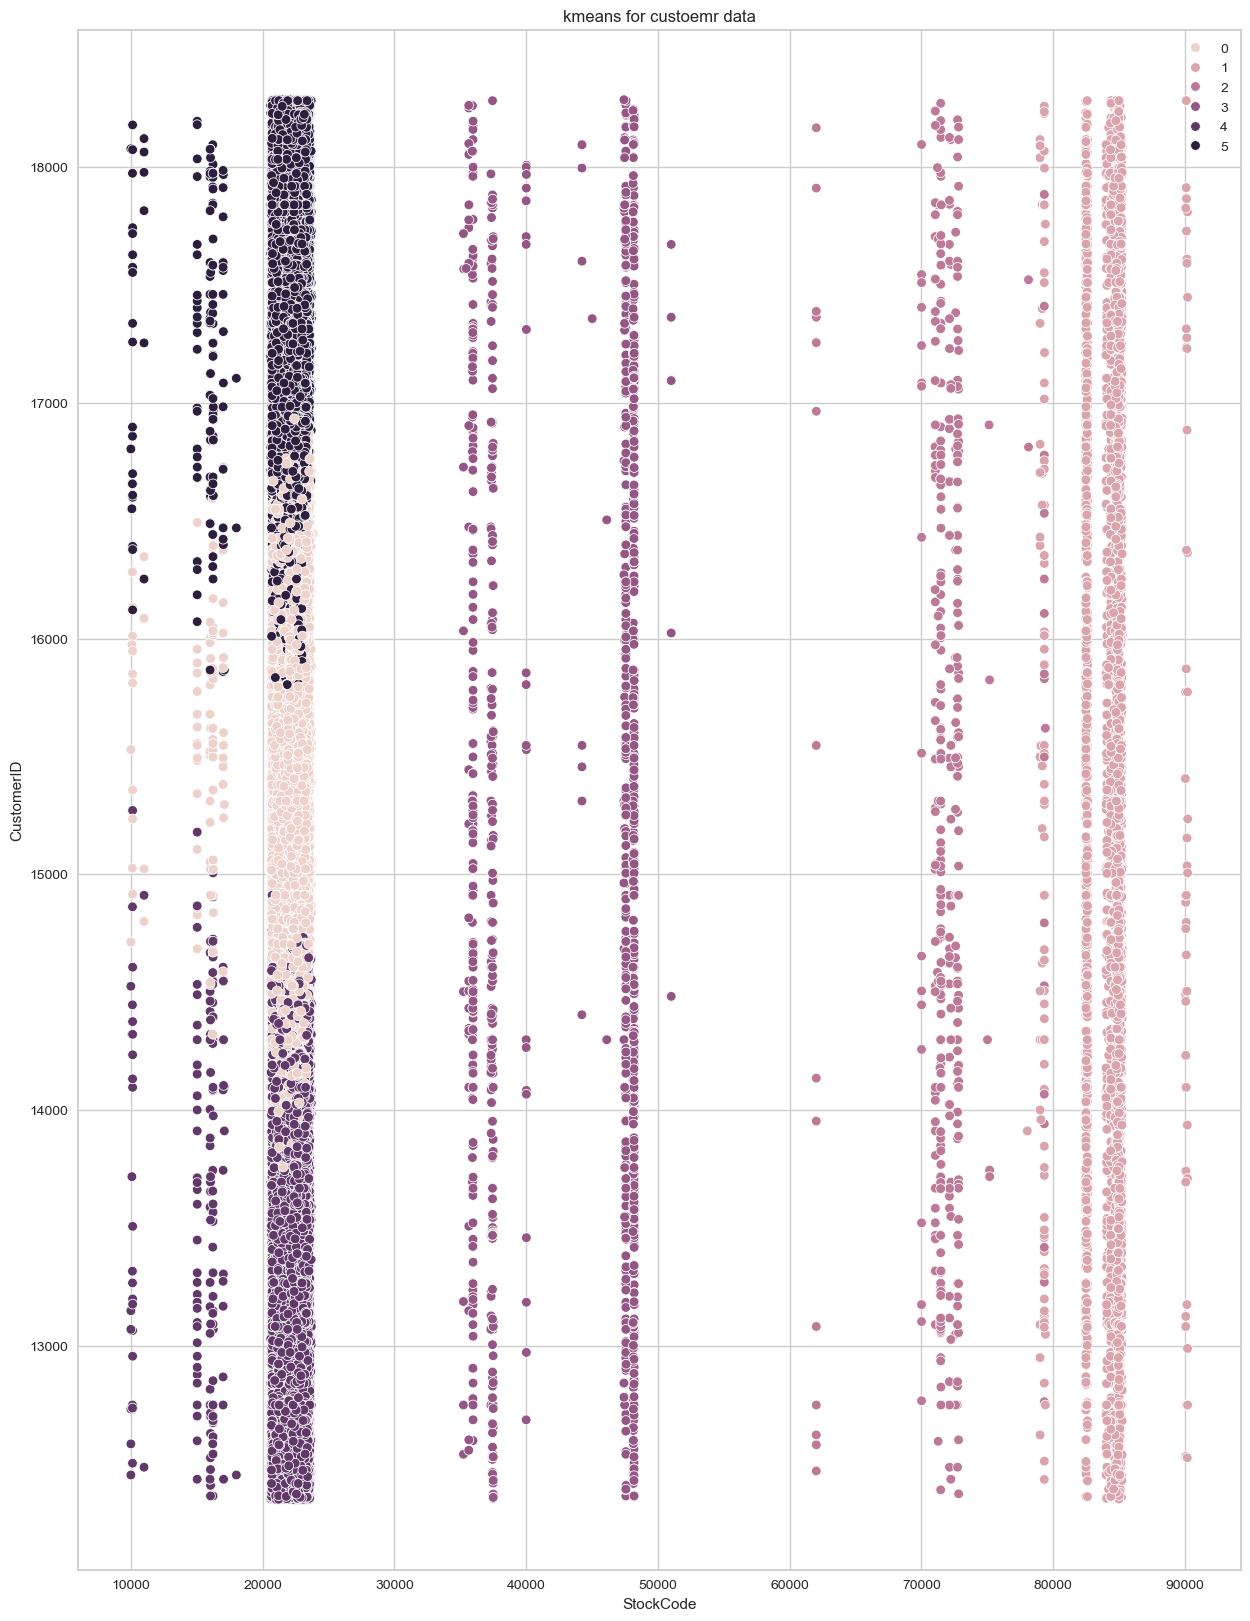

In [199]:
fig=plt.figure(figsize=(15,20))
sns.scatterplot(data = x_train, x = 'StockCode', y = 'CustomerID', hue = k.labels_)
plt.title('kmeans for custoemr data')
plt.show()

<h3>What is the optimal k?</h3>

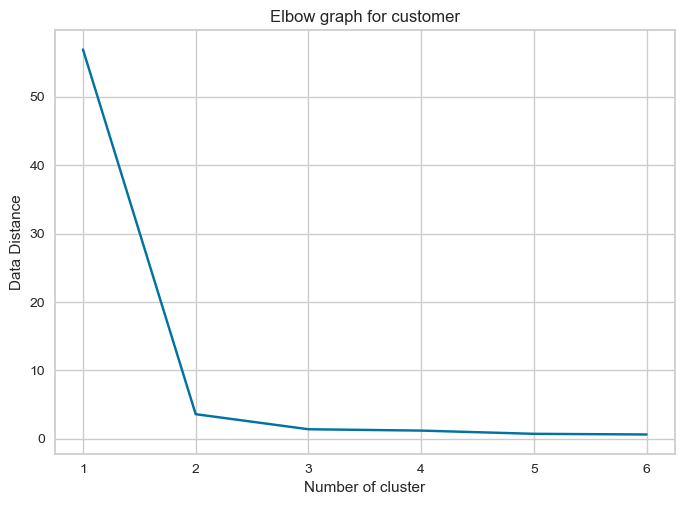

In [200]:
plt.plot(range(1,k_num),K_means_data)
plt.title("Elbow graph for customer")
plt.xlabel("Number of cluster")
plt.ylabel("Data Distance")
plt.show()